In [1]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, evaluate.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import *
from src.model_evaluation import *

# Import the data
from data.data_extract import load_data

Everything imported successfully.


In [2]:
# Load the data

df_data = load_data()
df_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
data = df_data.copy()
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


(48842, 15)

In [4]:
# Basic preprocessing : Fix target + remove useless columns + drop outliers
data = preprocess(data)
data.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Now Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married,Prof-specialty,Married,Black,Female,0,0,40,Other,0
5,37,Private,284582,14,Married,Exec-managerial,Married,White,Female,0,0,40,United-States,0
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Other,0
7,52,Self-emp,209642,9,Married,Exec-managerial,Married,White,Male,0,0,45,United-States,1
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,13,Married,Exec-managerial,Married,White,Male,5178,0,40,United-States,1


In [5]:
# Seperate the categorical and numerical variables
cat_features = get_cat_features(data)
cont_features = get_cont_features(data)

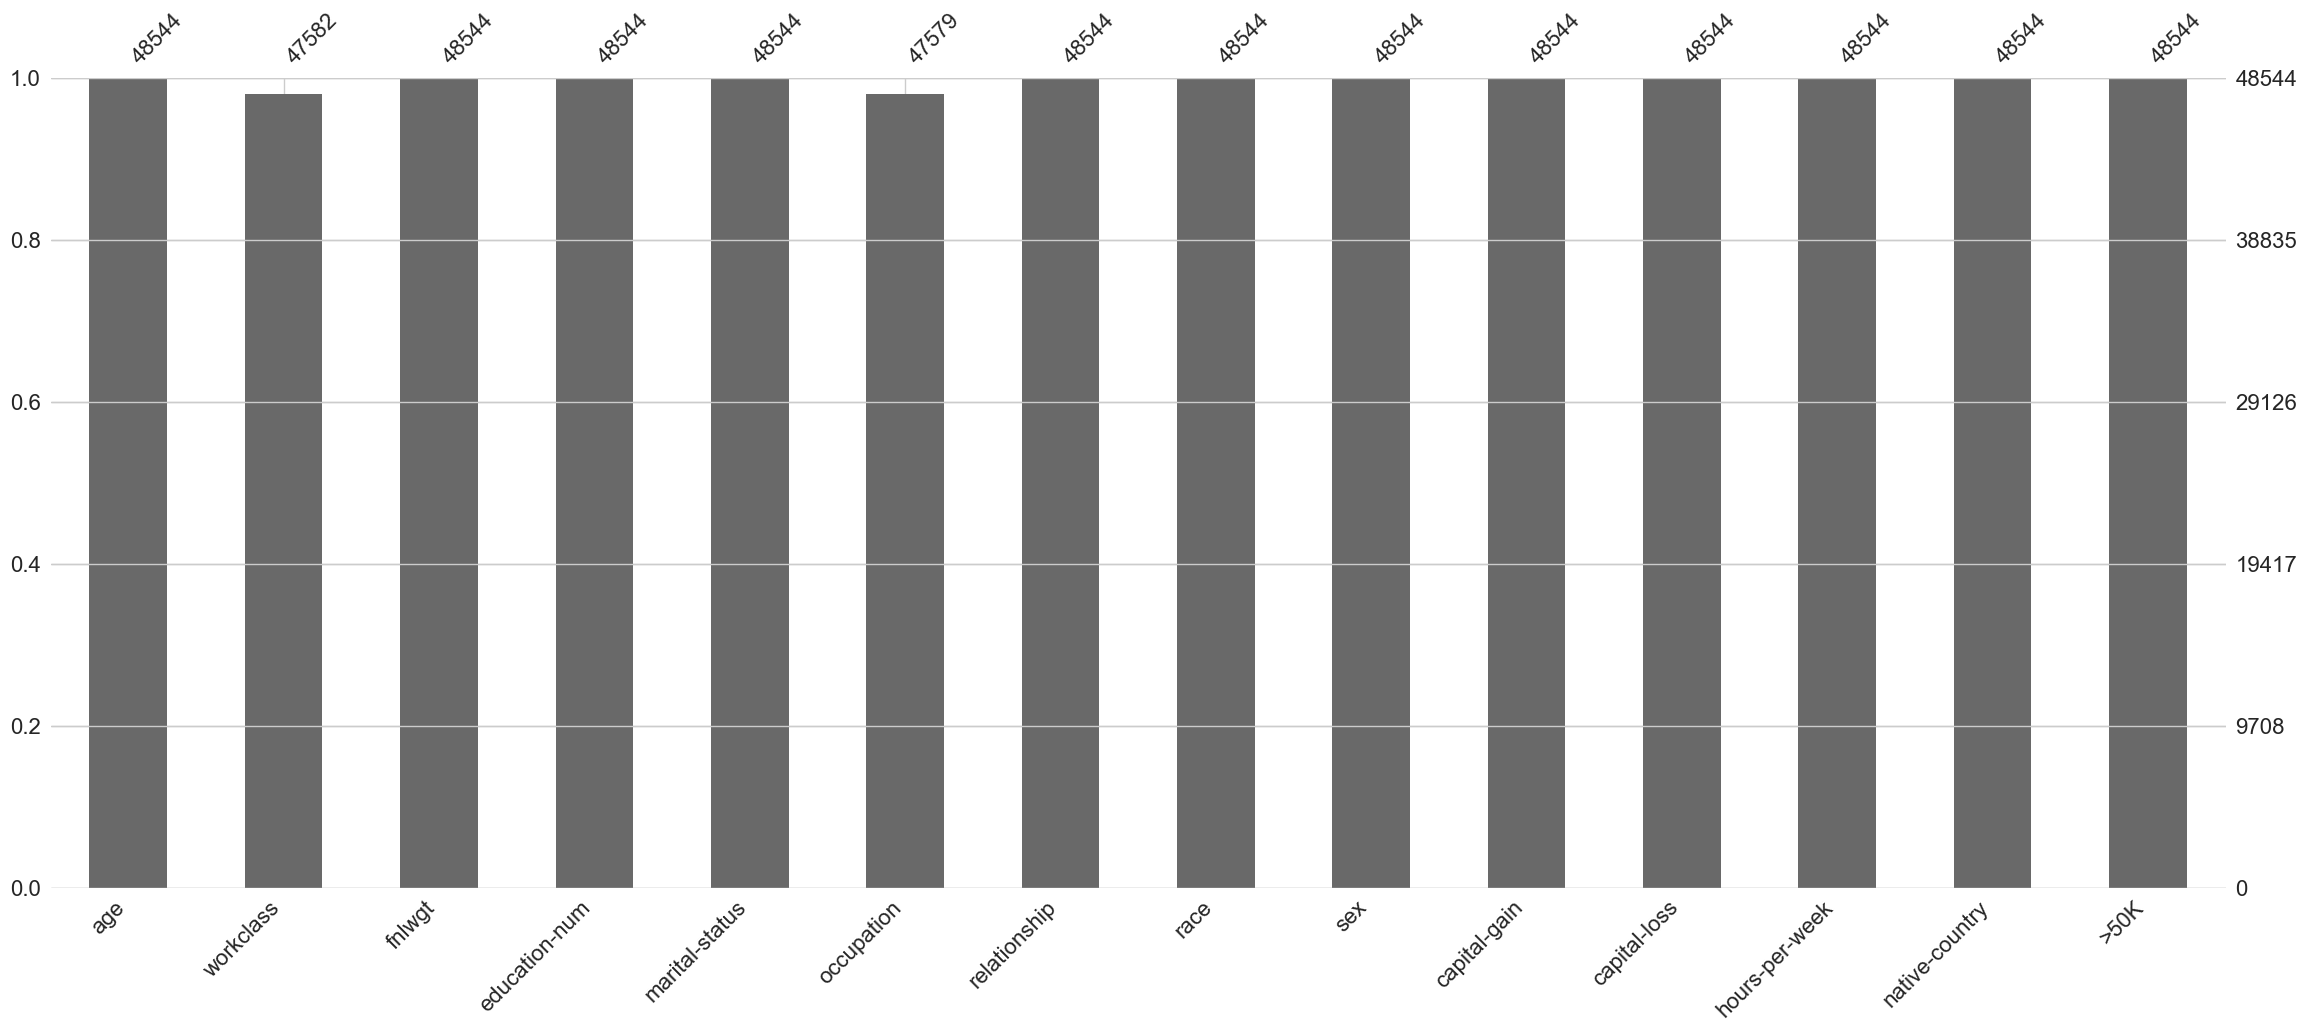

In [6]:
ax = msno.bar(data)

In [7]:
# Impute the missing values in the categorical variables
imput_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for feature in cat_features :
    data[feature] = imput_cat.fit_transform(data[feature].values.reshape(-1,1)).ravel()

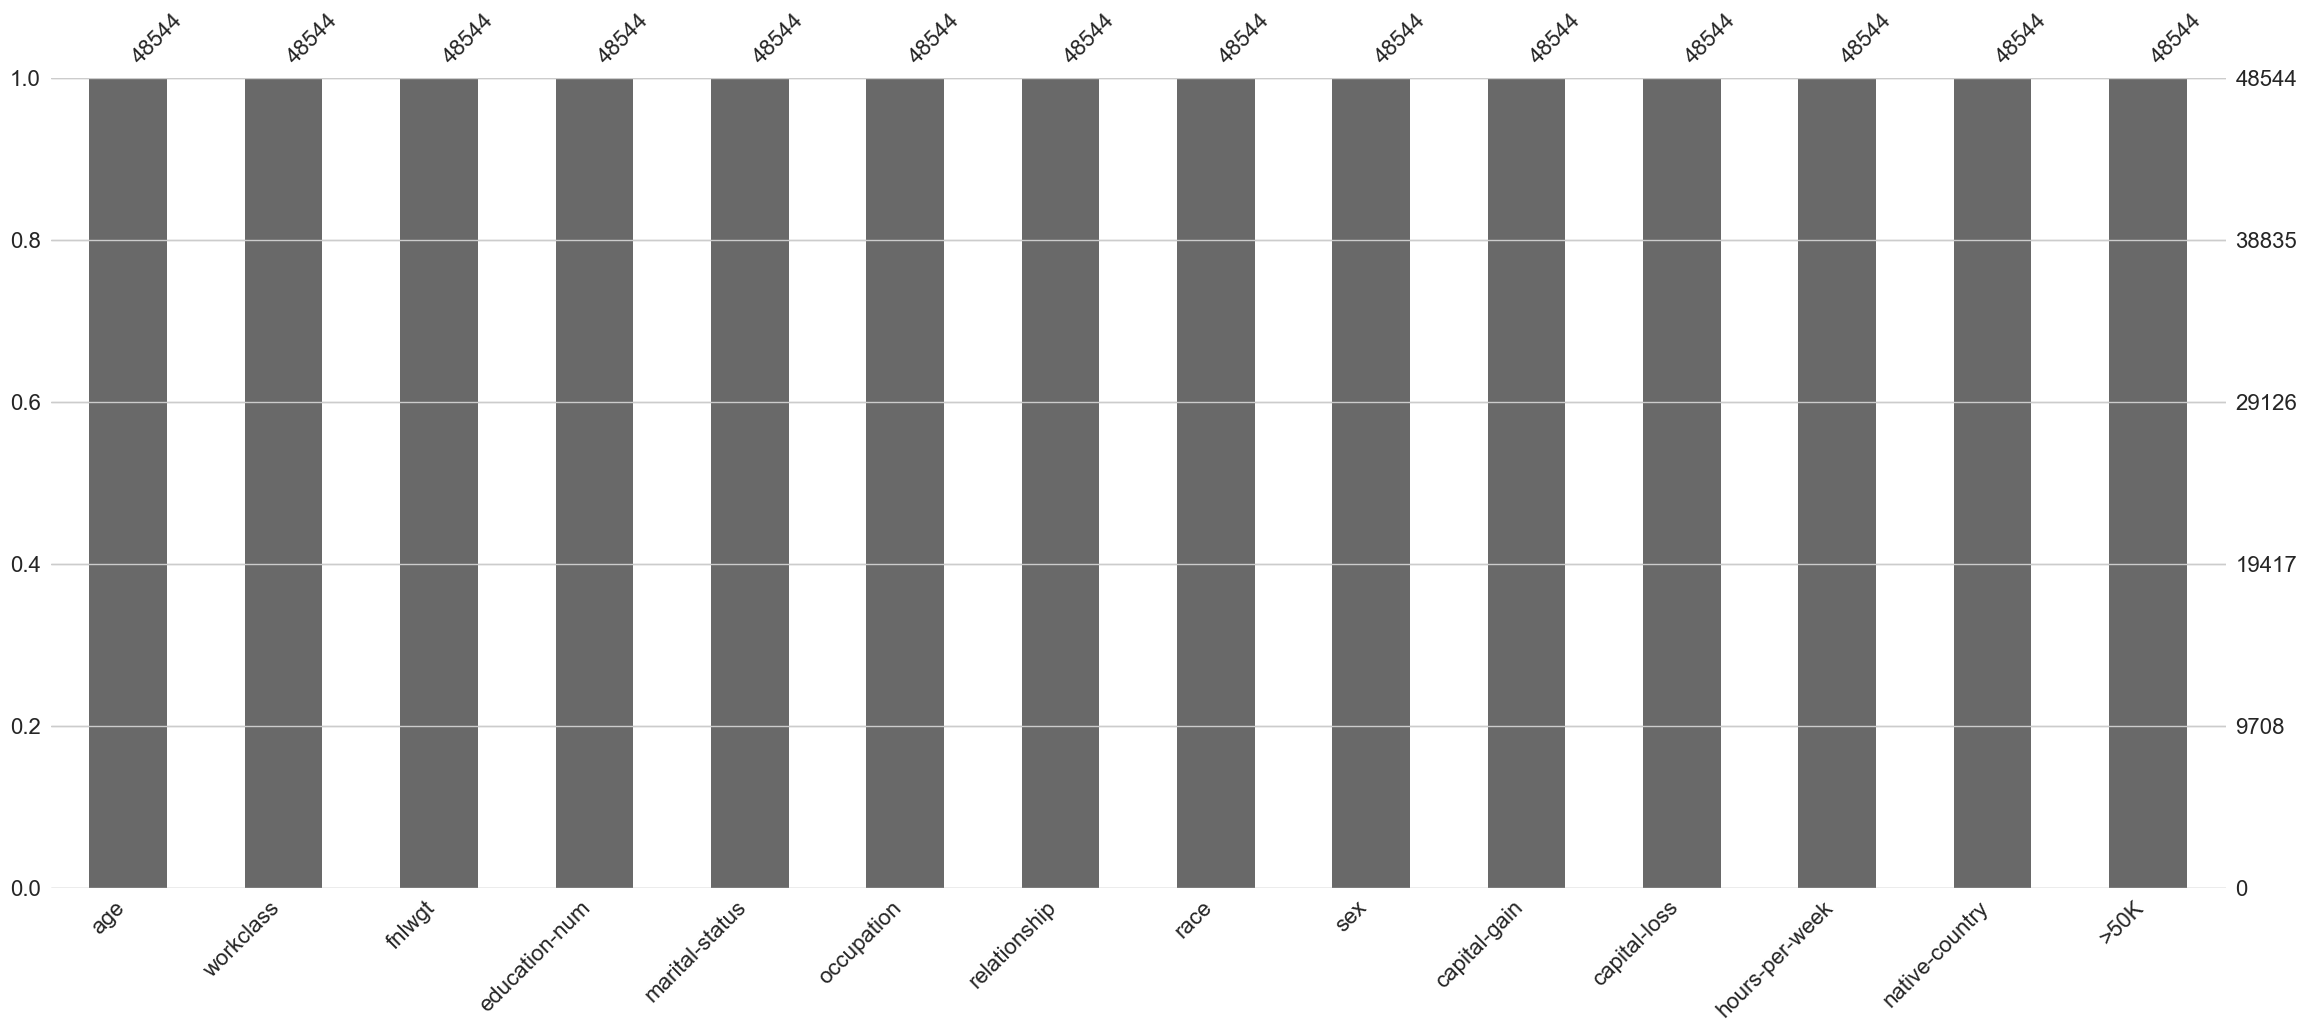

In [8]:
ax = msno.bar(data)

## Regrouping features

### Values not referenced

In [9]:
data['workclass'] = data['workclass'].replace({'?': 'Not referenced'})

data['native-country'] = data['native-country'].replace({'?': 'Not referenced'})

data['occupation'] = data['occupation'].replace({'?': 'Not referenced'})


### Workclass

In [10]:
# Regroup 'Without-pay' and 'Never-worked' to 'No revenu'
data['workclass'] = data['workclass'].replace({'Without-pay': 'No revenu', 'Never-worked': 'No revenu'})

# Regrouper 'Self-emp-not-inc' and 'Self-emp-inc' to 'Self-emp'
data['workclass'] = data['workclass'].replace({'Self-emp-not-inc': 'Self-emp', 'Self-emp-inc': 'Self-emp'})


In [11]:
data[data['workclass'] == 'Self-emp'].head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
1,50,Self-emp,83311,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
7,52,Self-emp,209642,9,Married,Exec-managerial,Married,White,Male,0,0,45,United-States,1
16,25,Self-emp,176756,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0
19,43,Self-emp,292175,14,Now Single,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,1
39,48,Self-emp,265477,12,Married,Prof-specialty,Married,White,Male,0,0,40,United-States,0
41,53,Self-emp,88506,13,Married,Prof-specialty,Married,White,Male,0,0,40,United-States,0
54,47,Self-emp,109832,9,Now Single,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,0
68,49,Self-emp,191681,10,Married,Exec-managerial,Married,White,Male,0,0,50,United-States,1
72,29,Self-emp,162298,13,Married,Sales,Married,White,Male,0,0,70,United-States,1
96,48,Self-emp,191277,16,Married,Prof-specialty,Married,White,Male,0,1902,60,United-States,1


### Marital-status

In [12]:
data['marital-status'] = data['marital-status'].replace({'Divorced': 'Now Single', 'Separated': 'Now Single', 'Widowed': 'Now Single'})

data['marital-status'] = data['marital-status'].replace({'Married-civ-spouse': 'Married', 'Married-AF-spouse': 'Married'})


### Relationship

In [13]:
data['relationship'] = data['relationship'].replace({'Husband': 'Married', 'Wife': 'Married'})


### Race

In [14]:
data['race'] = data['race'].replace({'Amer-Indian-Eskimo': 'Other'})


### Native-country

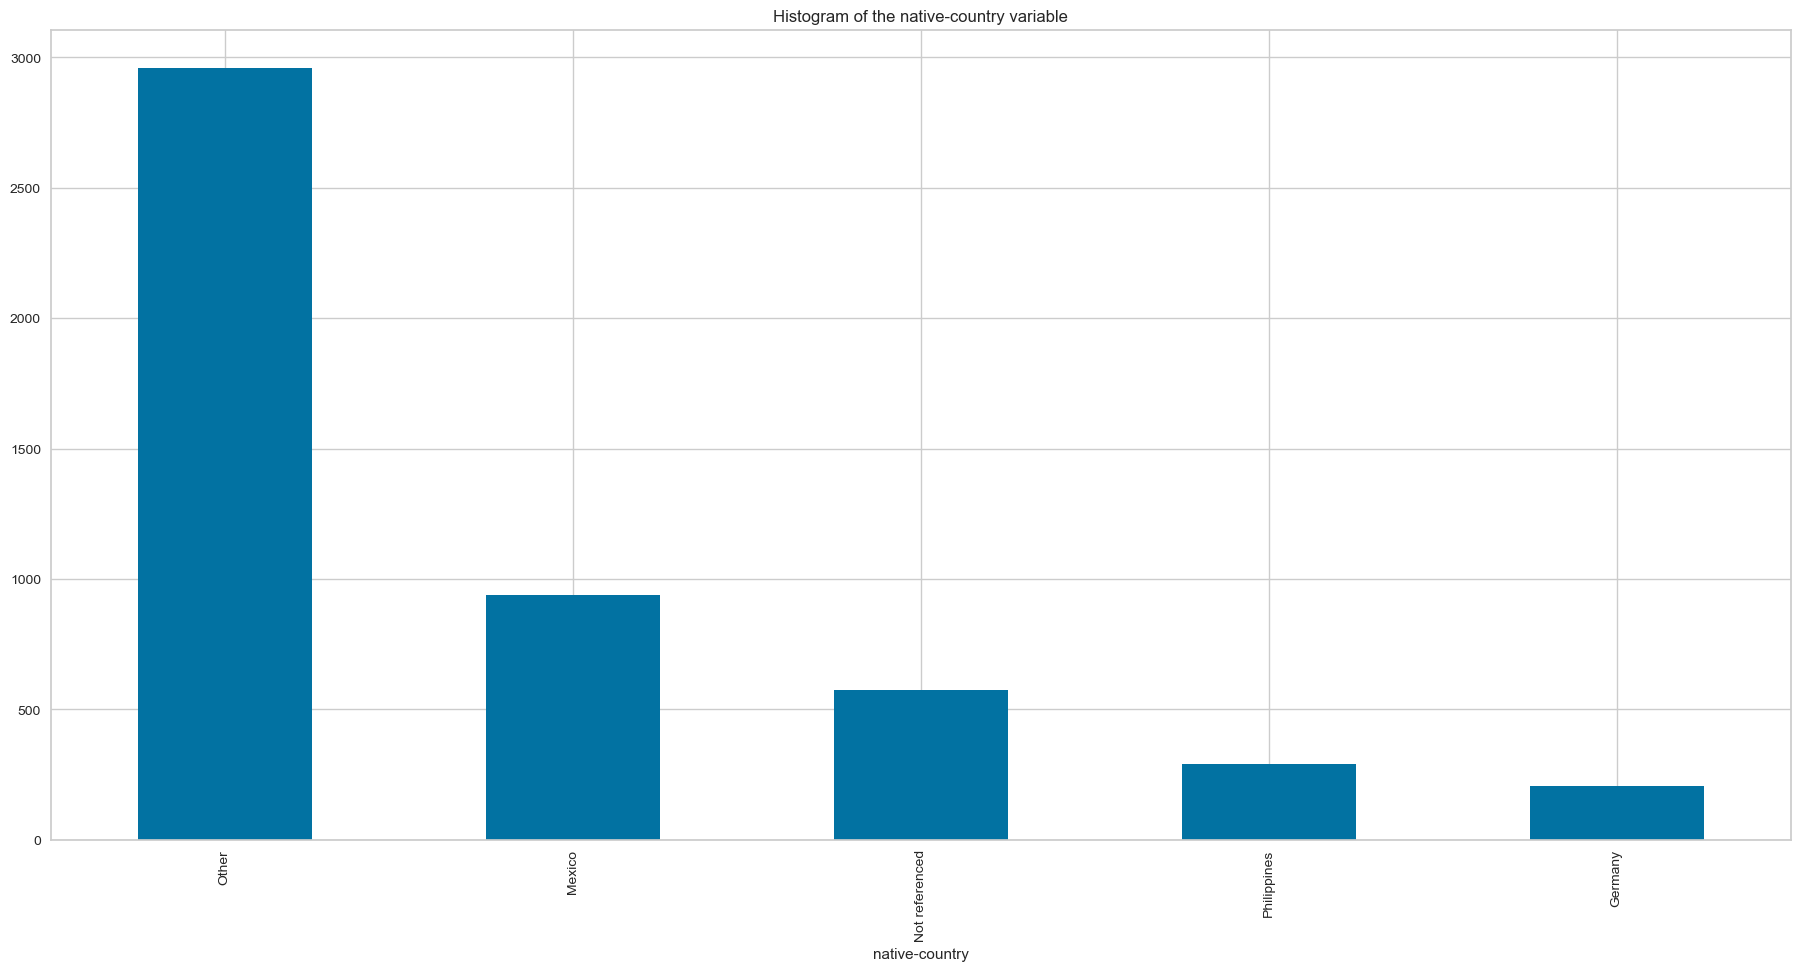

In [15]:
# For each value of the 'native-country' variable, we calculate the number of individuals who have this value
filtered = data[data['native-country'] != 'United-States']

plt.figure(figsize=(20, 10))
filtered['native-country'].value_counts().plot(kind='bar')
plt.title('Histogram of the native-country variable')
plt.show()


On met dans la catégorie "Other" tous les pays qui obtiennent un nombre d'observations inférieur à 200. 

In [16]:
# Counting for each value of the variable 'native-country' the number of individuals who have this value
filtered = data[data['native-country'] != 'United-States']

for country in filtered['native-country'].unique():
    nb_samples_associated = filtered[filtered['native-country'] == country].shape[0]
    if nb_samples_associated < 200:
        data['native-country'] = data['native-country'].replace({country: 'Other'})
        

### New features

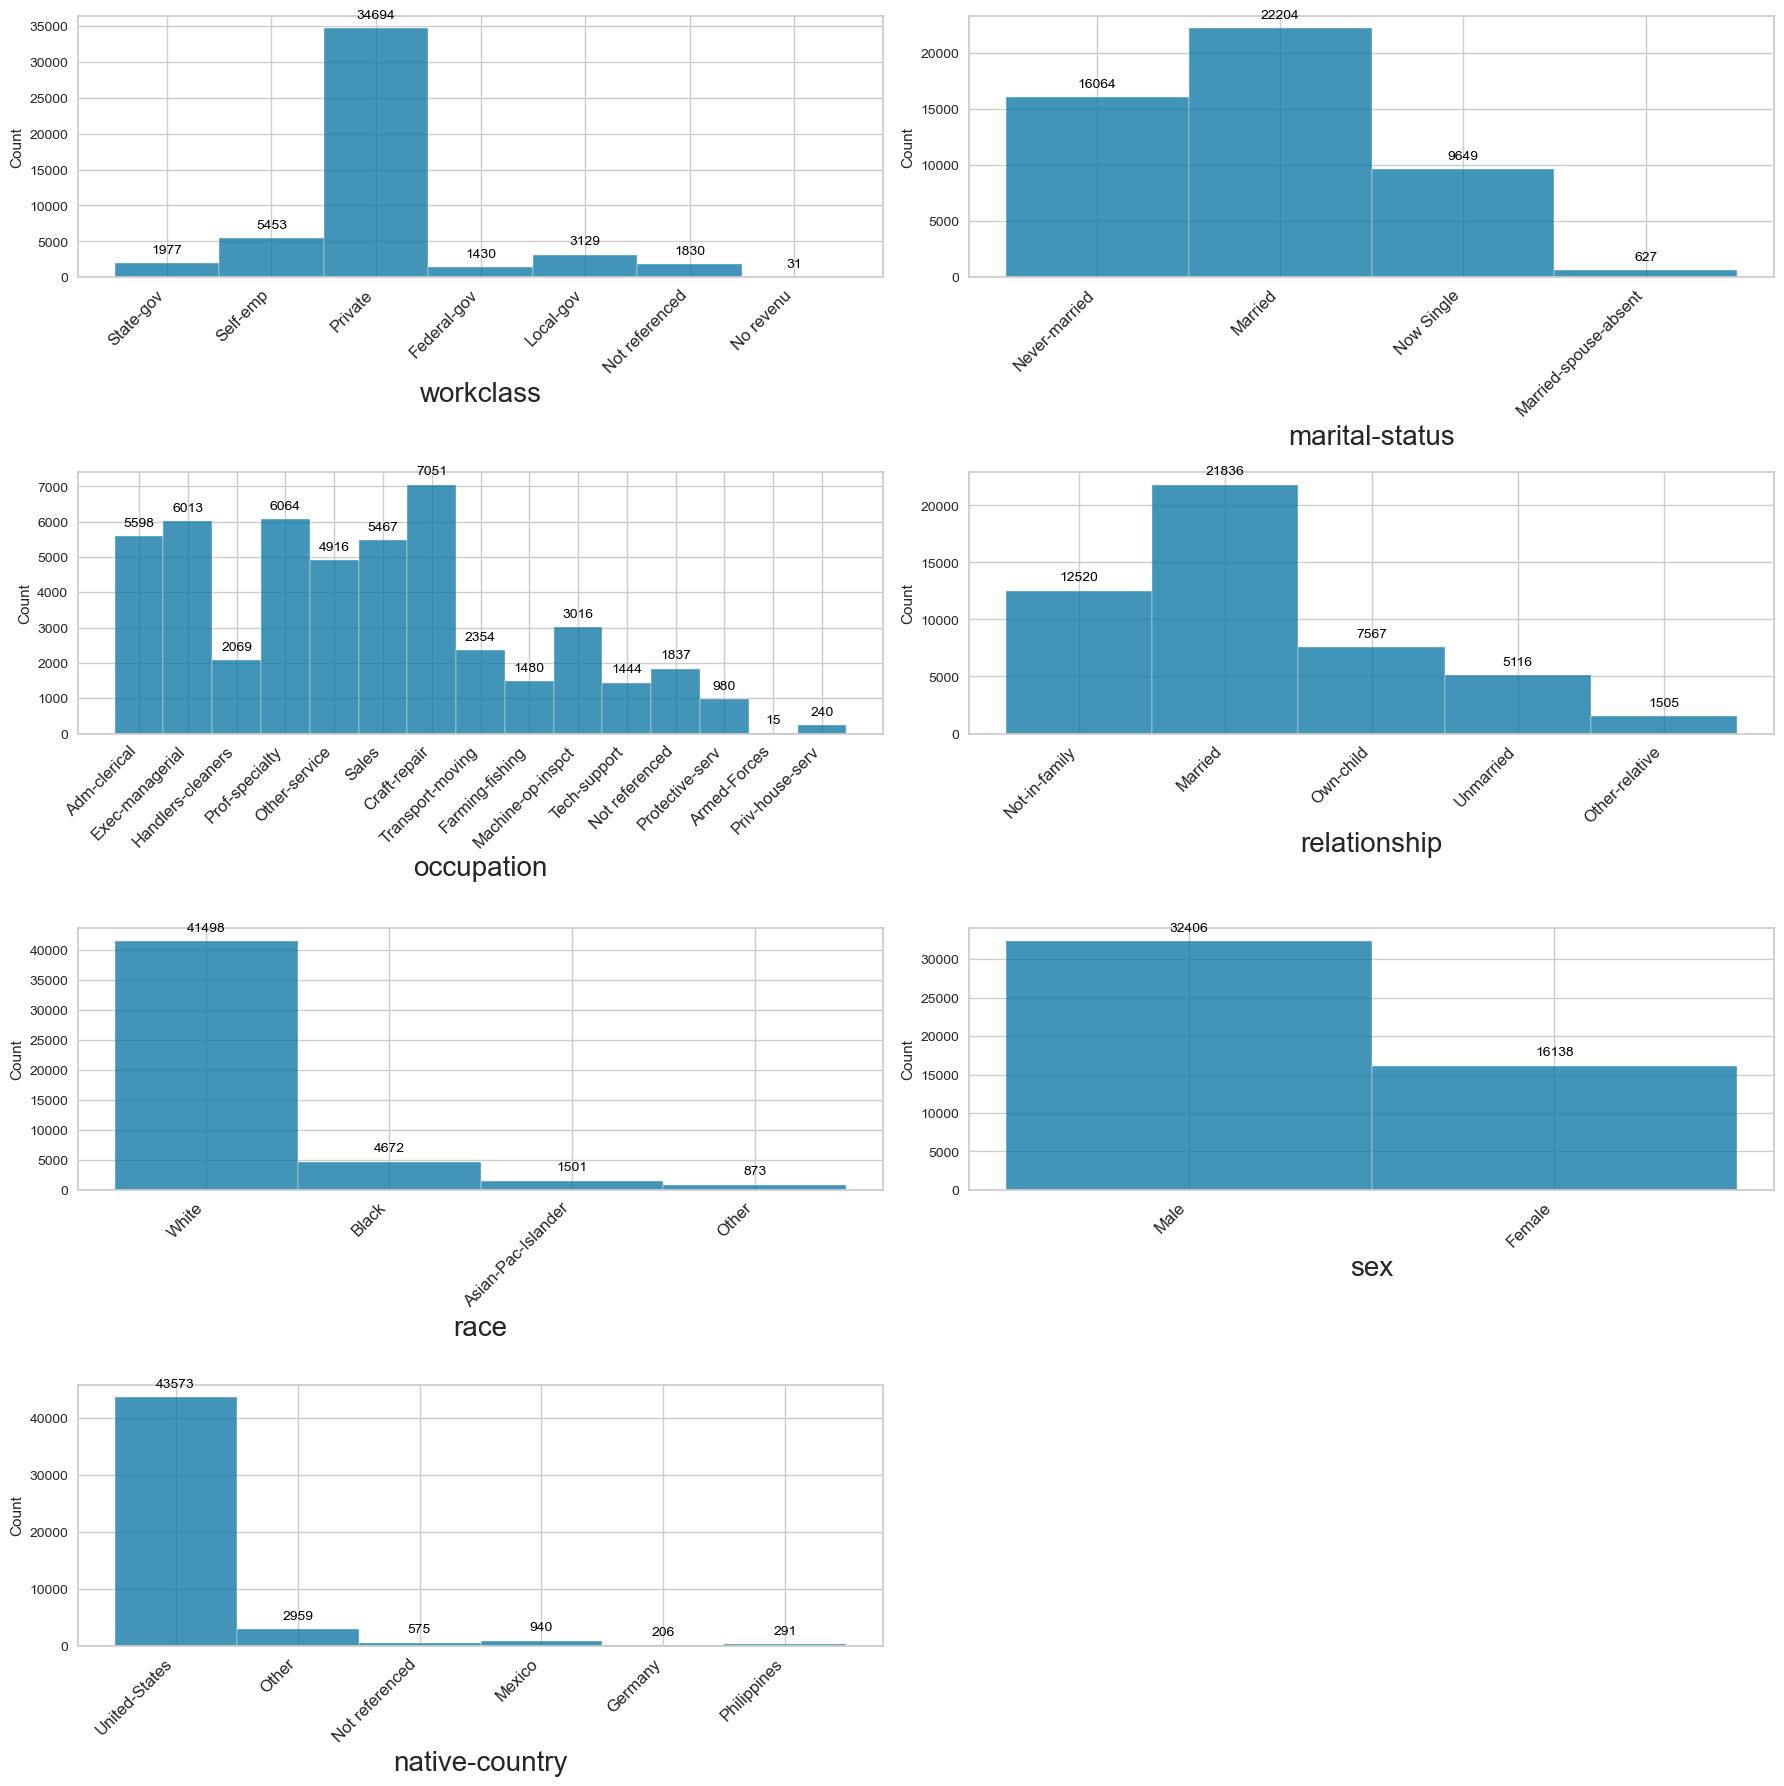

In [17]:
# Plot the distribution of the categorical variables
data_categ = data.select_dtypes(include='object')

plt.figure(figsize=(18, 18))
for i, feature in enumerate(data_categ.columns):
    if i <= 7:
        ax = plt.subplot(4, 2, i + 1)
        hist = sns.histplot(data[feature], ax=ax)
        
        if i == 7:  # Si c'est le dernier graphique, afficher uniquement la valeur la plus élevée car sinon illisible
            max_height = 0
            max_p = None
            for p in hist.patches:
                height = p.get_height()
                if height > max_height:
                    max_height = height
                    max_p = p
            if max_p is not None:
                ax.annotate(f'{max_height:.0f}',
                            xy=(max_p.get_x() + max_p.get_width() / 2, max_height),
                            xytext=(0, 5),  # Décalage vertical de 5 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, color='black')
        else:  # Pour les autres graphiques, afficher toutes les valeurs
            for p in hist.patches:
                height = p.get_height()
                ax.annotate(f'{height:.0f}',
                            xy=(p.get_x() + p.get_width() / 2, height),
                            xytext=(0, 5),  # Décalage vertical de 5 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, color='black')
        
        ax.set_xlabel(feature, fontsize=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

plt.tight_layout()
plt.show()

### Separating dataset - train and test

In [18]:
# Seperate the data into train and test
df_train, df_test = seperate_train_test(data, random_state=42)

In [19]:
df_train.shape, df_test.shape

((38835, 14), (9709, 14))

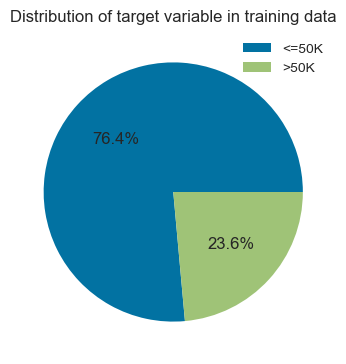

In [20]:
# Check the distribution of target variable in training data
plt.figure(figsize=(8, 4))
plt.pie(df_train['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.title('Distribution of target variable in training data')
plt.show()

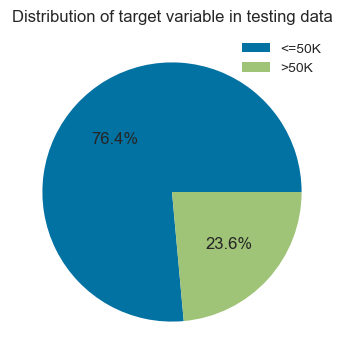

In [21]:
# Check the distribution of target variable in test data
plt.figure(figsize=(8, 4))
plt.pie(df_test['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.title('Distribution of target variable in testing data')
plt.show()

## Standardization

### Df_train, Df_test

In [22]:
# Separate the features and target variable
X_train = df_train.drop('>50K', axis=1)
y_train = df_train['>50K']

X_test = df_test.drop('>50K', axis=1)
y_test = df_test['>50K']

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((38835, 13), (38835,), (9709, 13), (9709,))

### Separate Categorical and numerical variables

In [24]:
# Seperate the categorical and numerical variables
cat_features = df_train.select_dtypes('object').columns
cat_features.append(pd.Index(['education-num']))

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')

In [25]:
cont_features = df_train.select_dtypes('int64').columns
cont_features = cont_features.drop('education-num')
cont_features = cont_features.drop('>50K')
cont_features

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

### Numerical variables

In [26]:
X_train.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20628,25,Private,197303,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States
34928,32,Self-emp,158603,11,Never-married,Sales,Unmarried,White,Female,0,0,7,United-States
18703,73,Federal-gov,127858,10,Now Single,Tech-support,Not-in-family,White,Female,3273,0,40,United-States
26780,42,Self-emp,78765,10,Now Single,Exec-managerial,Unmarried,White,Male,0,0,90,United-States
38471,35,Self-emp,190759,10,Now Single,Craft-repair,Own-child,White,Male,0,0,40,United-States
12313,68,Private,214521,15,Now Single,Prof-specialty,Unmarried,White,Female,0,0,16,United-States
20808,21,Private,275291,10,Never-married,Sales,Own-child,White,Male,0,0,12,United-States
16671,33,Private,511517,9,Married,Prof-specialty,Married,White,Male,0,0,40,United-States
11649,25,Private,60358,10,Never-married,Sales,Own-child,White,Male,0,0,40,United-States
20774,21,Private,43535,10,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States


In [27]:
# Standard Scaler

X_train_std, X_test_std = standardize(X_train, X_test, cont_features)

In [28]:
X_train_std.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20628,-0.993898,Private,0.070748,13,Never-married,Prof-specialty,Own-child,White,Female,-0.231956,-0.218153,-0.031402,United-States
34928,-0.484253,Self-emp,-0.295999,11,Never-married,Sales,Unmarried,White,Female,-0.231956,-0.218153,-2.692497,United-States
18703,2.500811,Federal-gov,-0.587359,10,Now Single,Tech-support,Not-in-family,White,Female,1.052857,-0.218153,-0.031402,United-States
26780,0.243811,Self-emp,-1.052597,10,Now Single,Exec-managerial,Unmarried,White,Male,-0.231956,-0.218153,4.000560,United-States
38471,-0.265834,Self-emp,0.008732,10,Now Single,Craft-repair,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States
12313,2.136779,Private,0.233917,15,Now Single,Prof-specialty,Unmarried,White,Female,-0.231956,-0.218153,-1.966744,United-States
20808,-1.285124,Private,0.809813,10,Never-married,Sales,Own-child,White,Male,-0.231956,-0.218153,-2.289301,United-States
16671,-0.411447,Private,3.048446,9,Married,Prof-specialty,Married,White,Male,-0.231956,-0.218153,-0.031402,United-States
11649,-0.993898,Private,-1.227033,10,Never-married,Sales,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States
20774,-1.285124,Private,-1.386459,10,Never-married,Sales,Not-in-family,White,Female,-0.231956,-0.218153,-0.031402,United-States


### Categorical variables

In [29]:
X_train_std.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20628,-0.993898,Private,0.070748,13,Never-married,Prof-specialty,Own-child,White,Female,-0.231956,-0.218153,-0.031402,United-States
34928,-0.484253,Self-emp,-0.295999,11,Never-married,Sales,Unmarried,White,Female,-0.231956,-0.218153,-2.692497,United-States
18703,2.500811,Federal-gov,-0.587359,10,Now Single,Tech-support,Not-in-family,White,Female,1.052857,-0.218153,-0.031402,United-States
26780,0.243811,Self-emp,-1.052597,10,Now Single,Exec-managerial,Unmarried,White,Male,-0.231956,-0.218153,4.000560,United-States
38471,-0.265834,Self-emp,0.008732,10,Now Single,Craft-repair,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States
12313,2.136779,Private,0.233917,15,Now Single,Prof-specialty,Unmarried,White,Female,-0.231956,-0.218153,-1.966744,United-States
20808,-1.285124,Private,0.809813,10,Never-married,Sales,Own-child,White,Male,-0.231956,-0.218153,-2.289301,United-States
16671,-0.411447,Private,3.048446,9,Married,Prof-specialty,Married,White,Male,-0.231956,-0.218153,-0.031402,United-States
11649,-0.993898,Private,-1.227033,10,Never-married,Sales,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States
20774,-1.285124,Private,-1.386459,10,Never-married,Sales,Not-in-family,White,Female,-0.231956,-0.218153,-0.031402,United-States


In [30]:
# One Hot Encoding

X_train_encoded, X_test_encoded = encode_cat_features_onehot(X_train_std, X_test_std, cat_features)

In [31]:
X_train_encoded.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_No revenu,workclass_Not referenced,workclass_Private,workclass_Self-emp,workclass_State-gov,marital-status_Married,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Now Single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Not referenced,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Married,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Germany,native-country_Mexico,native-country_Not referenced,native-country_Other,native-country_Philippines,native-country_United-States
0,-0.993898,0.070748,13,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.484253,-0.295999,11,-0.231956,-0.218153,-2.692497,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.500811,-0.587359,10,1.052857,-0.218153,-0.031402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.243811,-1.052597,10,-0.231956,-0.218153,4.000560,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.265834,0.008732,10,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2.136779,0.233917,15,-0.231956,-0.218153,-1.966744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,-1.285124,0.809813,10,-0.231956,-0.218153,-2.289301,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,-0.411447,3.048446,9,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,-0.993898,-1.227033,10,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-1.285124,-1.386459,10,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
X_train_encoded.shape, y_train.shape, X_test_encoded.shape, y_test.shape

((38835, 49), (38835,), (9709, 49), (9709,))

## Modelisation - KNN

In [33]:
X_train = X_train_encoded
X_test = X_test_encoded

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7422
           1       0.75      0.53      0.62      2287

    accuracy                           0.85      9709
   macro avg       0.81      0.74      0.77      9709
weighted avg       0.84      0.85      0.84      9709



In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100]}
]

# Initialize Grid Search
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=3, n_jobs=-1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

class ProgressPrinter:
    def __init__(self, search, verbose=True):
        self.search = search
        self.verbose = verbose
        
    def print_progress(self):
        if self.verbose:
            means = self.search.cv_results_['mean_test_score']
            stds = self.search.cv_results_['std_test_score']
            params = self.search.cv_results_['params']
            for mean, std, params in zip(means, stds, params):
                print(f"Mean accuracy: {mean:.4f} (±{std:.4f}) with params: {params}")
                print(f"Time taken: {self.search.refit_time_:.2f} seconds")
                print()
                
progress_printer = ProgressPrinter(grid_search)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model
best_svm_model = grid_search.best_estimator_

# Make predictions
y_pred_best = best_svm_model.predict(X_test)

# Evaluate the fine-tuned model
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7422
           1       0.75      0.55      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.81      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709



SVM

Matrice de confusion:
[[7008  414]
 [1021 1266]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7422
           1       0.75      0.55      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.81      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 85.219899 



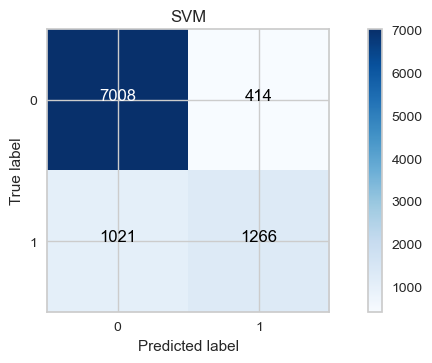

In [41]:
plot_confusion_matrix_sns(y_test, y_pred_best, "SVM")

In [42]:
import joblib
model_name = 'svm'
joblib.dump(best_svm_model, '../models/' + model_name + '.pkl')

# Pour chargez le modèle depuis le fichier
# model_loaded = joblib.load(model_name + '.pkl')

['../models/svm.pkl']

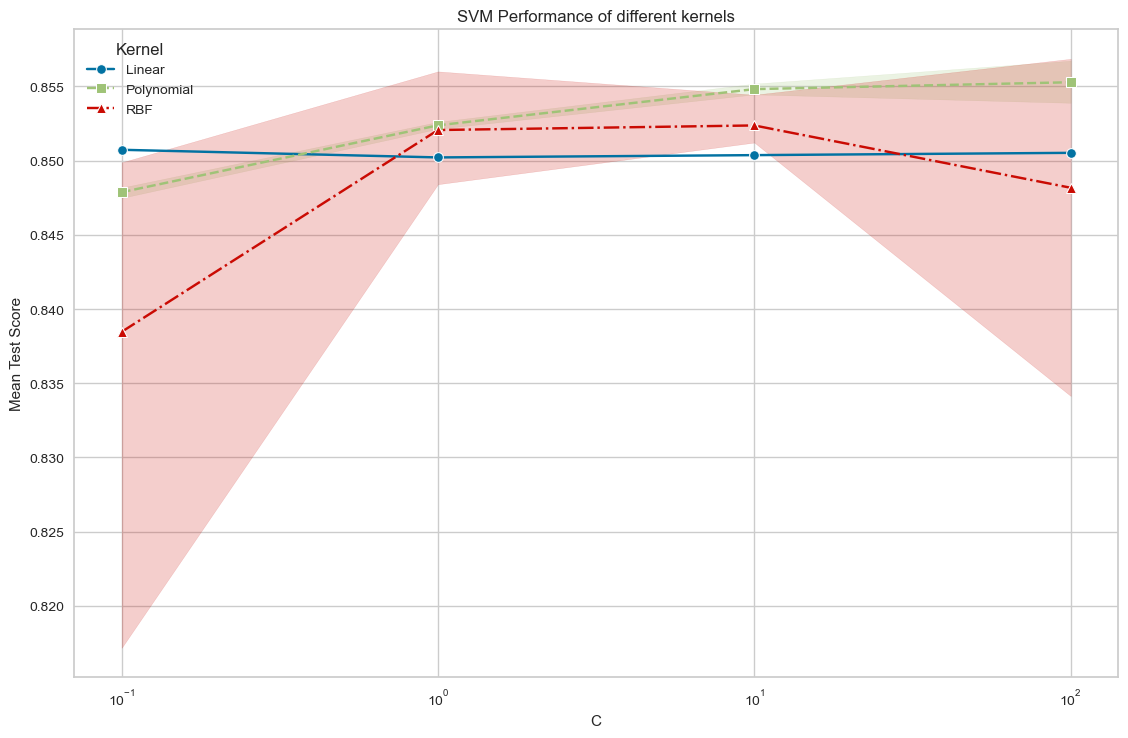

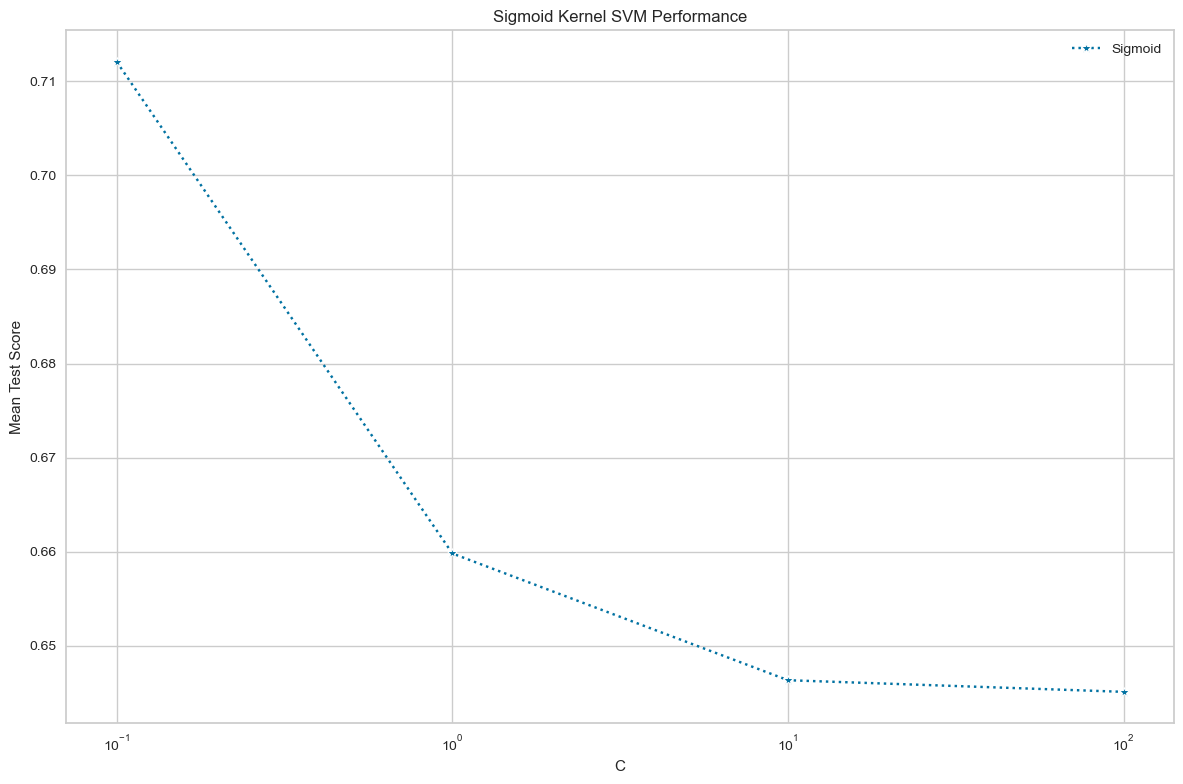

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'grid_search' is already fitted and contains the results

# Extracting grid search results
results = grid_search.cv_results_
params = results['params']
mean_test_scores = results['mean_test_score']

# Extracting hyperparameters and corresponding scores
params_df = pd.DataFrame(params)
params_df['mean_test_score'] = mean_test_scores

# Plotting each kernel separately
plt.figure(figsize=(12, 8))

# Plot for linear kernel
linear_mask = params_df['kernel'] == 'linear'
sns.lineplot(x='C', y='mean_test_score', data=params_df[linear_mask], label='Linear', marker='o', linestyle='-')

# Plot for polynomial kernel
poly_mask = params_df['kernel'] == 'poly'
sns.lineplot(x='C', y='mean_test_score', data=params_df[poly_mask], label='Polynomial', marker='s', linestyle='--')

# Plot for RBF kernel
rbf_mask = params_df['kernel'] == 'rbf'
sns.lineplot(x='C', y='mean_test_score', data=params_df[rbf_mask], label='RBF', marker='^', linestyle='-.')

plt.xscale('log')
plt.title('SVM Performance of different kernels')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.legend(title='Kernel')

# Create a new plot for sigmoid kernel
plt.figure(figsize=(12, 8))
sigmoid_mask = params_df['kernel'] == 'sigmoid'
sns.lineplot(x='C', y='mean_test_score', data=params_df[sigmoid_mask], label='Sigmoid', marker='*', linestyle=':')

plt.xscale('log')

plt.title('Sigmoid Kernel SVM Performance')
plt.xlabel('C')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()


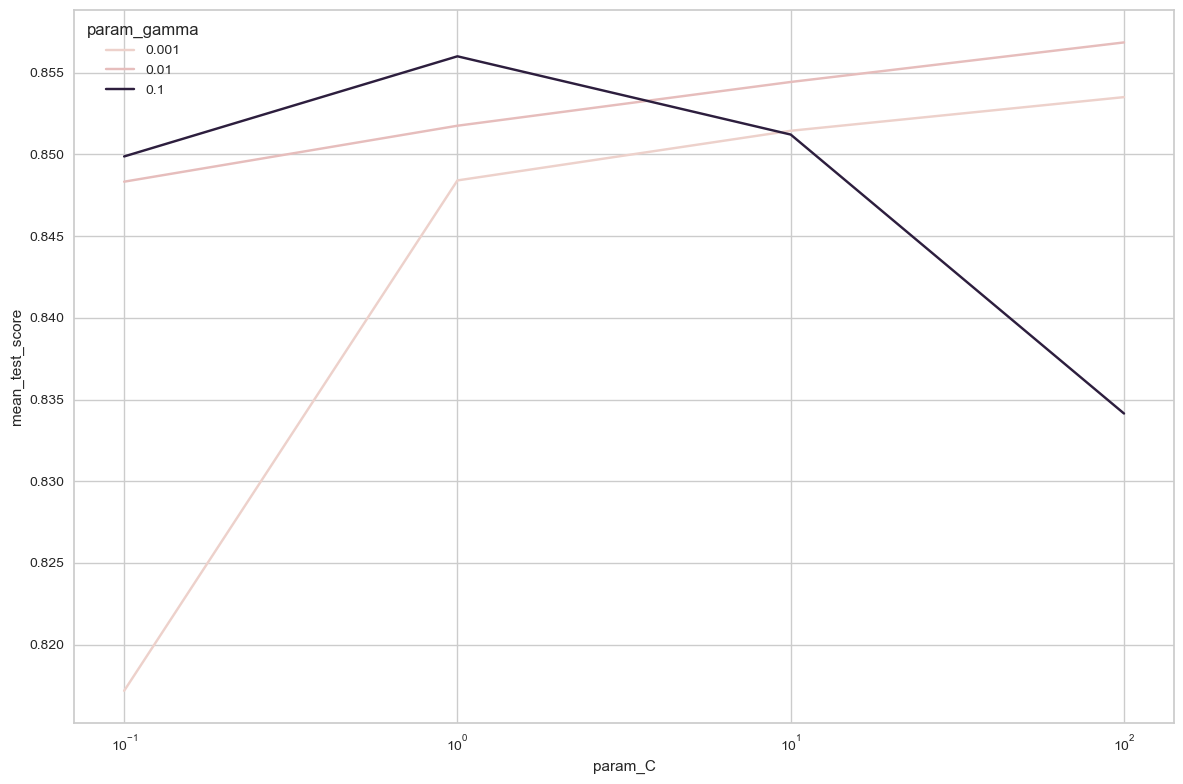

In [66]:
# Zoom in of rbf

plt.figure(figsize=(12, 8))
rbf_mask = params_df['kernel'] == 'rbf'
sns.lineplot(x='param_C', y='mean_test_score', data=results, hue='param_gamma')

plt.xscale('log')
plt.tight_layout()
plt.show()